# Unemployment Analysis in India

This notebook analyzes the unemployment rate data, investigating trends, the impact of COVID-19, and regional differences.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import datetime

# Set plot style
plt.style.use("ggplot")
sns.set_theme(style="whitegrid")

## 1. Data Loading and Cleaning

In [2]:
# Load dataset
df = pd.read_csv("Unemployment in India.csv")

# Display first few rows
print(df.head())

# Clean column names (remove leading/trailing spaces)
df.columns = df.columns.str.strip()
print("\nCleaned Column Names:", df.columns.tolist())

# Convert Date to datetime
df["Date"] = pd.to_datetime(df["Date"].str.strip(), format="%d-%m-%Y")

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Drop rows with missing values if any (usually at the end)
df.dropna(inplace=True)

# Extract Year and Month for analysis
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month_name()

print("\nData Info:")
print(df.info())

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  

Cleaned Column Names: ['Region', 'Date', 'Frequency', 'Estimated Unemployment Ra

## 2. Exploratory Data Analysis (EDA)

In [3]:
# Descriptive Statistics
print(df.describe())

                                Date  Estimated Unemployment Rate (%)  \
count                            740                       740.000000   
mean   2019-12-12 18:36:58.378378496                        11.787946   
min              2019-05-31 00:00:00                         0.000000   
25%              2019-08-31 00:00:00                         4.657500   
50%              2019-11-30 00:00:00                         8.350000   
75%              2020-03-31 00:00:00                        15.887500   
max              2020-06-30 00:00:00                        76.740000   
std                              NaN                        10.721298   

       Estimated Employed  Estimated Labour Participation Rate (%)  \
count        7.400000e+02                               740.000000   
mean         7.204460e+06                                42.630122   
min          4.942000e+04                                13.330000   
25%          1.190404e+06                                38.06

### Unemployment Rate Over Time

/tmp/ipykernel_1341244/3078365201.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x="Date", y="Estimated Unemployment Rate (%)", hue="Area", ci=None)


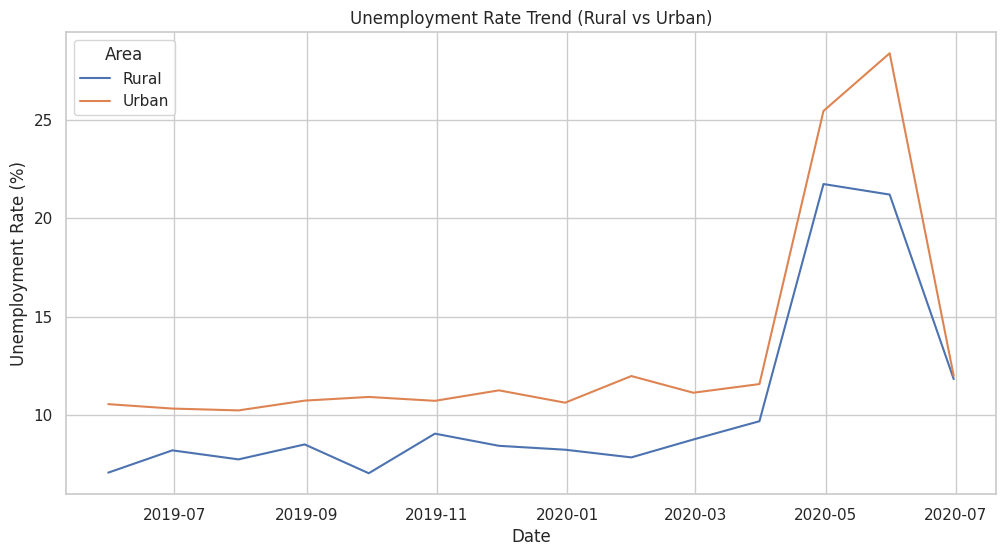

In [4]:
# Trend of Unemployment Rate over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Date", y="Estimated Unemployment Rate (%)", hue="Area", ci=None)
plt.title("Unemployment Rate Trend (Rural vs Urban)")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.show()

### Unemployment by Region (State)

/tmp/ipykernel_1341244/450872551.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_unemp, x="Estimated Unemployment Rate (%)", y="Region", palette="viridis")


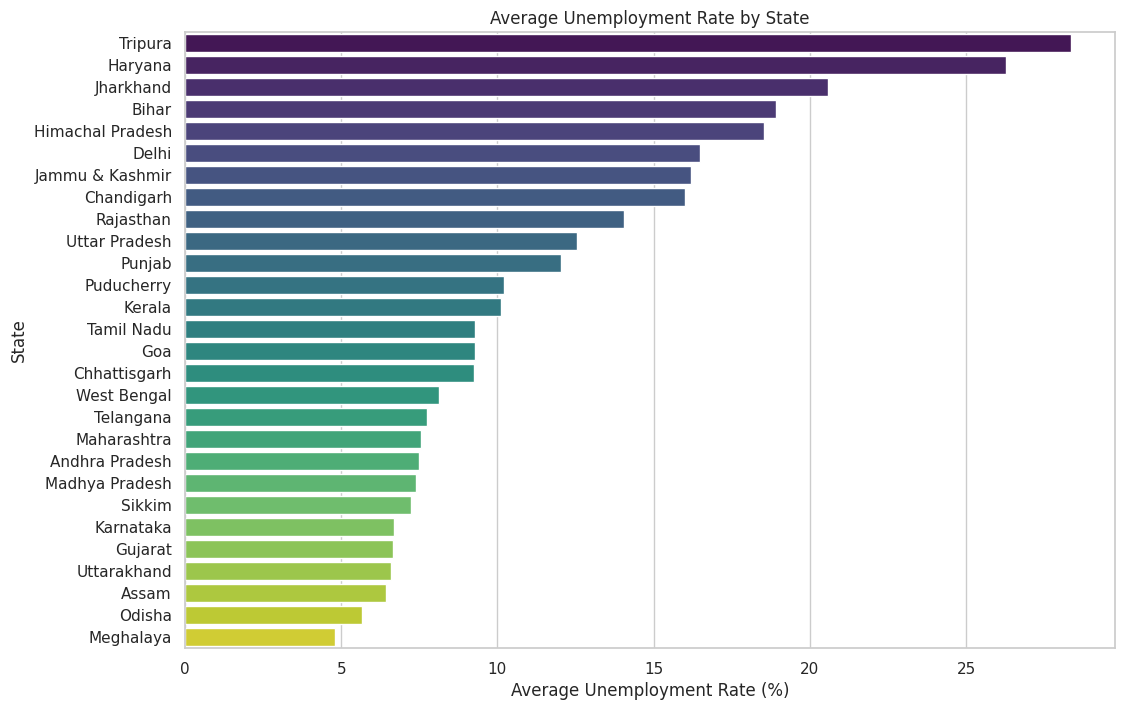

In [5]:
# Average Unemployment Rate by Region
avg_unemp = df.groupby("Region")["Estimated Unemployment Rate (%)"].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data=avg_unemp, x="Estimated Unemployment Rate (%)", y="Region", palette="viridis")
plt.title("Average Unemployment Rate by State")
plt.xlabel("Average Unemployment Rate (%)")
plt.ylabel("State")
plt.show()

## 3. Impact of COVID-19
Comparing pre-COVID (2019) and COVID (2020) periods.

/tmp/ipykernel_1341244/1199700190.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Year", y="Estimated Unemployment Rate (%)", palette="Set2")


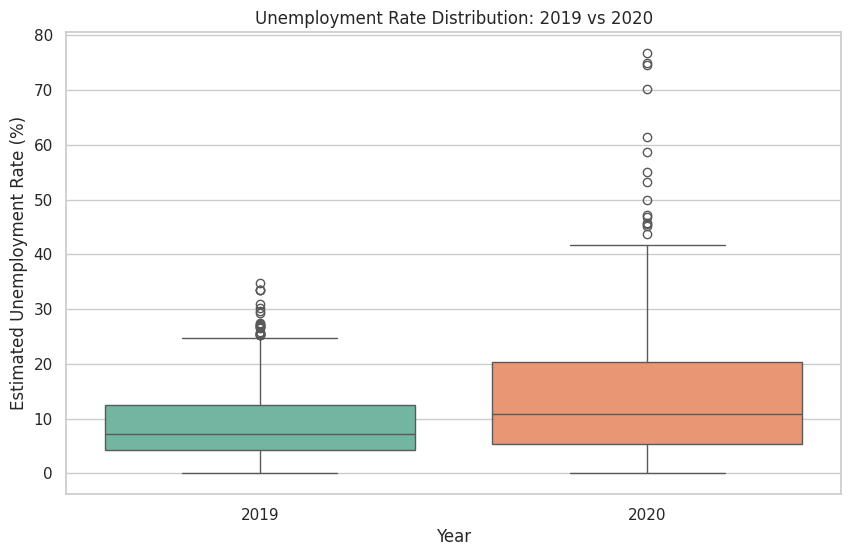

/tmp/ipykernel_1341244/1199700190.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(order)


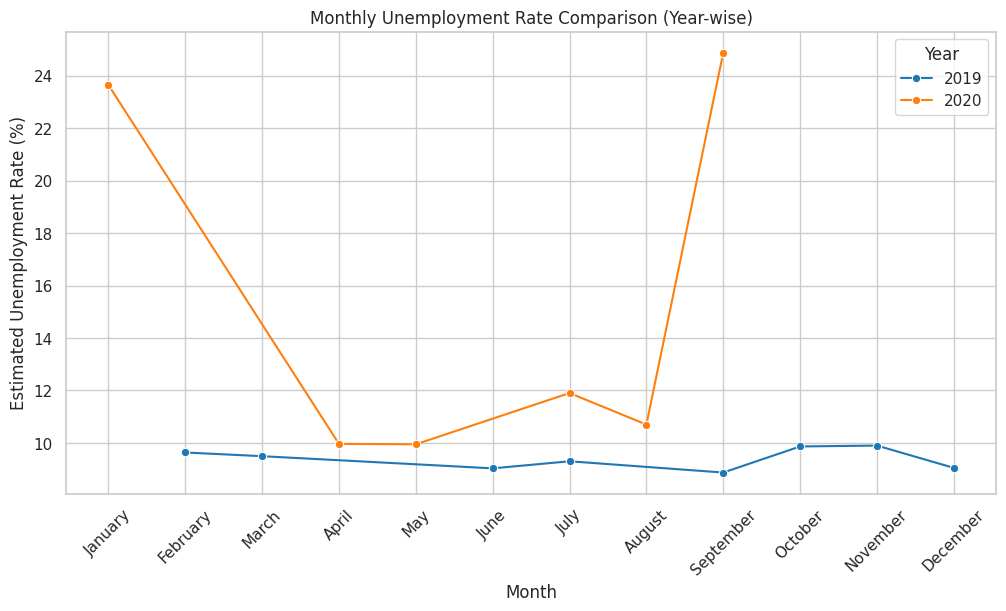

In [6]:
# Compare 2019 vs 2020
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Year", y="Estimated Unemployment Rate (%)", palette="Set2")
plt.title("Unemployment Rate Distribution: 2019 vs 2020")
plt.show()

# Monthly trend comparison
monthly_trend = df.groupby(["Month", "Year"])["Estimated Unemployment Rate (%)"].mean().reset_index()
order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trend, x="Month", y="Estimated Unemployment Rate (%)", hue="Year", palette="tab10", marker="o")
plt.title("Monthly Unemployment Rate Comparison (Year-wise)")
plt.xticks(rotation=45)
# Reorder x-axis
plt.gca().set_xticklabels(order) 
plt.show()

## 4. Key Patterns and Correlation

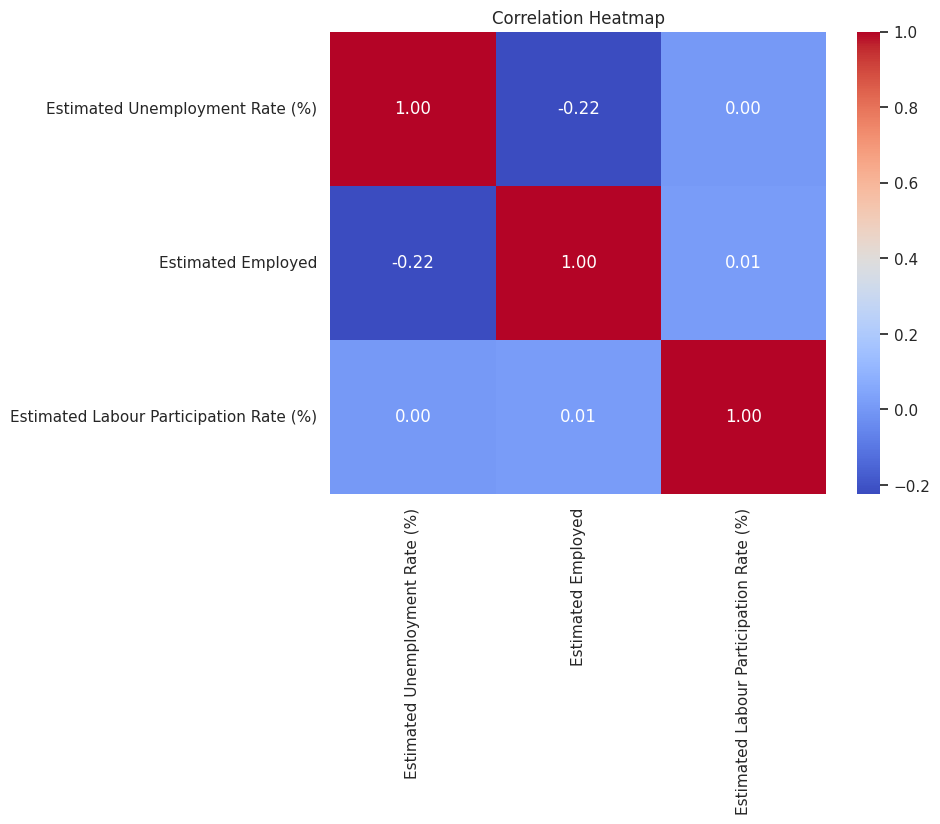

In [7]:
# Correlation Matrix
corr = df[["Estimated Unemployment Rate (%)", "Estimated Employed", "Estimated Labour Participation Rate (%)"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## 5. Conclusion & Insights

*   **COVID Impact:** There is a sharp spike in unemployment rates around early 2020 (likely corresponding to the lockdown period).
*   **Regional Disparities:** Some states show significantly higher average unemployment rates than others.
*   **Rural vs Urban:** The trend analysis highlights differences in how rural and urban areas were affected over time.